# HW5: Diabetes against all ML
In this homework, we will test all what we studied about classifications in the ML class using the diabetes dataset.

In [1]:
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

# data file is named 'diabetes_.csv'
df = pd.read_csv('diabetes.csv')

# separate the features from the targets
features = df.drop(columns=['Outcome'])
target = df['Outcome']

# df.shape -> (768, 9)
# features.shape -> (768, 8)
# target.shape -> (768,)

In [2]:
# create a function that will print and format all the requested scores
def all_scores(true_train, pred_train, true_test, pred_test):
    
    print('ACCURACY:')
    # accuracy score for train and test
    print('train acc:',metrics.accuracy_score(true_train, pred_train))
    print('test acc:',metrics.accuracy_score(true_test, pred_test))
    
    print('\nPRECISION:')
    # precision score for train and test
    print('train precision:',metrics.precision_score(true_train, pred_train))
    print('test precision:',metrics.precision_score(true_test, pred_test))
    
    print('\nRECALL:')
    # recall score for train and test
    print('train recall:',metrics.recall_score(true_train, pred_train))
    print('test recall:',metrics.recall_score(true_test, pred_test))
    
    print('\nF1:')
    # f1 score for train and test
    print('train f1:',metrics.f1_score(true_train, pred_train))
    print('test f1:',metrics.f1_score(true_test, pred_test))

# function that plots the precision and accuracy curves
def pre_acc_curves(true_test, test_prob):
    thresholds = np.linspace(0.1,1,10)
    precision_list=[]
    accuracy_list=[]

    # create the lists of points to plot for precision and accuracy
    for threshold in thresholds:
        pred_test = test_prob>=threshold
        precision_list.append(metrics.precision_score(true_test, pred_test))
        accuracy_list.append(metrics.accuracy_score(true_test, pred_test))

    plt.figure()
    plt.plot(thresholds, precision_list)
    plt.plot(thresholds, accuracy_list, c='r')
    plt.legend(['Precision', 'Accuracy'], loc='lower left')
    plt.xticks(np.arange(0.1, 1.1, step=0.1))

### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

<BarContainer object of 8 artists>

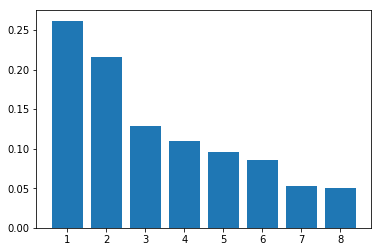

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standarize the feature and use them move forward
x = StandardScaler().fit_transform(features)

# princple component analysis, retrieve components that explain
# at least 95% of the the variance in the data
pca = PCA(n_components=0.95)
pca.fit(x)

# plot the components by importance
pca.explained_variance_ratio_
plt.bar(np.arange(1,9,step=1), pca.explained_variance_ratio_)

# if we conduct pca without scaling then we find that 2 principle components
# are enough to explain 95% of the variance in the data. however it is better
# practice to scale/standardize the data first before feeding it to pca.

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score. Is that a good clustering?

In [4]:
from sklearn.cluster import KMeans

# build and fit model, then predict with it
kmeans = KMeans(n_clusters=2).fit(x)
y_pred = kmeans.predict(x)

# calculate cluster scores to see if we have good clustering
print('homogeneity:',metrics.homogeneity_score(labels_true=target, labels_pred=y_pred))
print('completeness:',metrics.completeness_score(labels_true=target, labels_pred=y_pred))

# this does not appear to be good cluster as homogeneity and completeness
# are both below 10%. the scores signify better clustering at the high end 
# of the score spectrum, however that threshold is tbd by the analyst.

homogeneity: 0.062009620308069786
completeness: 0.061486590826321706


### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [5]:
from sklearn.model_selection import train_test_split

# splitting the data in to train and test
# note we are splitting scaled features
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3)

# x_train.shape -> (537, 8)
# y_train.shape -> (537,)
# x_test.shape -> (231, 8)
# y_test.shape -> (231,)

### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

ACCURACY:
train acc: 0.7746741154562383
test acc: 0.7878787878787878

PRECISION:
train precision: 0.7375
test precision: 0.6833333333333333

RECALL:
train recall: 0.5989847715736041
test recall: 0.5774647887323944

F1:
train f1: 0.6610644257703081
test f1: 0.6259541984732825


E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

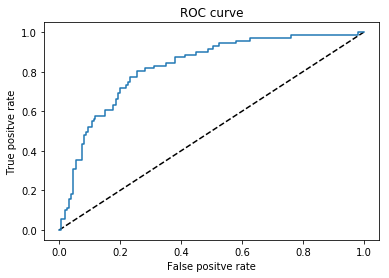

In [6]:
from sklearn.linear_model import LogisticRegression

# build and fit the logistic model
logreg = LogisticRegression().fit(x_train, y_train)

# predict for train, predict and obtain probabilities for test
train_pred = logreg.predict(x_train)
test_pred = logreg.predict(x_test)
prob_test = logreg.predict_proba(x_test) 

# print all the scores requested
all_scores(y_train, train_pred, y_test, test_pred)

# roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')

plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


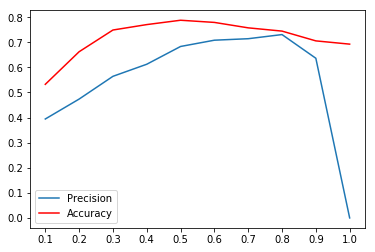

In [7]:
# plots the precision and accuracy curves
pre_acc_curves(y_test, prob_test[:,1])

## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

In [8]:
import keras
from keras import models, layers, activations, regularizers, optimizers

# initialize the model
dnn = models.Sequential()

# create the input, hidden, and output layers
dnn.add(layers.Dense(30, activation='relu', input_dim=8, kernel_regularizer=regularizers.l2(0.0075)))
dnn.add(layers.Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
dnn.add(layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
dnn.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.0075)))

# compile the model with a learning rate
dnn.compile(optimizer=optimizers.Adam(lr=0.000125), loss='binary_crossentropy', metrics=['accuracy'])

# fit the model and store returns in history
history = dnn.fit(x_train, y_train, epochs=300, batch_size=100, validation_data=(x_test, y_test))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 537 samples, validate on 231 samples
Epoch 1/300
537/537 [==============================] - 1s 1ms/step - loss: 0.9599 - acc: 0.4432 - val_loss: 0.9610 - val_acc: 0.4329
Epoch 2/300
537/537 [==============================] - 0s 32us/step - loss: 0.9563 - acc: 0.4507 - val_loss: 0.9574 - val_acc: 0.4719
Epoch 3/300
537/537 [==============================] - 0s 32us/step - loss: 0.9531 - acc: 0.4600 - val_loss: 0.9540 - val_acc: 0.4719
Epoch 4/300
537/537 [==============================] - 0s 32us/step - loss: 0.9501 - acc: 0.4786 - val_loss: 0.9507 - val_acc: 0.4805
Epoch 5/300
537/537 [==============================] - 0s 28us/step - loss: 0.9471 - acc: 0.4991 - val_loss: 0.9477 - val_acc: 0.5152
Epoch 6/300
537/537 [==============================] - 0s 34us/step - loss: 0.9444 - acc: 0.5047 - val_loss: 0.9447 - val_acc: 0.5238
Epoch 7/300
537/537 [==========

537/537 [==============================] - 0s 28us/step - loss: 0.7202 - acc: 0.7467 - val_loss: 0.7028 - val_acc: 0.7706
Epoch 118/300
537/537 [==============================] - 0s 26us/step - loss: 0.7192 - acc: 0.7505 - val_loss: 0.7017 - val_acc: 0.7706
Epoch 119/300
537/537 [==============================] - 0s 26us/step - loss: 0.7180 - acc: 0.7505 - val_loss: 0.7006 - val_acc: 0.7706
Epoch 120/300
537/537 [==============================] - 0s 24us/step - loss: 0.7169 - acc: 0.7523 - val_loss: 0.6995 - val_acc: 0.7706
Epoch 121/300
537/537 [==============================] - 0s 26us/step - loss: 0.7158 - acc: 0.7542 - val_loss: 0.6985 - val_acc: 0.7706
Epoch 122/300
537/537 [==============================] - 0s 24us/step - loss: 0.7147 - acc: 0.7542 - val_loss: 0.6974 - val_acc: 0.7749
Epoch 123/300
537/537 [==============================] - 0s 24us/step - loss: 0.7136 - acc: 0.7542 - val_loss: 0.6964 - val_acc: 0.7706
Epoch 124/300
537/537 [==============================] - 0s 24

Epoch 177/300
537/537 [==============================] - 0s 26us/step - loss: 0.6642 - acc: 0.7747 - val_loss: 0.6539 - val_acc: 0.7792
Epoch 178/300
537/537 [==============================] - 0s 24us/step - loss: 0.6635 - acc: 0.7728 - val_loss: 0.6533 - val_acc: 0.7792
Epoch 179/300
537/537 [==============================] - 0s 24us/step - loss: 0.6627 - acc: 0.7728 - val_loss: 0.6527 - val_acc: 0.7792
Epoch 180/300
537/537 [==============================] - 0s 26us/step - loss: 0.6620 - acc: 0.7728 - val_loss: 0.6522 - val_acc: 0.7792
Epoch 181/300
537/537 [==============================] - 0s 24us/step - loss: 0.6612 - acc: 0.7709 - val_loss: 0.6515 - val_acc: 0.7792
Epoch 182/300
537/537 [==============================] - 0s 24us/step - loss: 0.6604 - acc: 0.7691 - val_loss: 0.6509 - val_acc: 0.7792
Epoch 183/300
537/537 [==============================] - 0s 24us/step - loss: 0.6597 - acc: 0.7691 - val_loss: 0.6502 - val_acc: 0.7792
Epoch 184/300
537/537 [=========================

537/537 [==============================] - 0s 24us/step - loss: 0.5947 - acc: 0.7747 - val_loss: 0.6016 - val_acc: 0.7965
Epoch 297/300
537/537 [==============================] - 0s 26us/step - loss: 0.5943 - acc: 0.7747 - val_loss: 0.6012 - val_acc: 0.7965
Epoch 298/300
537/537 [==============================] - 0s 22us/step - loss: 0.5939 - acc: 0.7747 - val_loss: 0.6008 - val_acc: 0.7965
Epoch 299/300
537/537 [==============================] - 0s 26us/step - loss: 0.5935 - acc: 0.7765 - val_loss: 0.6005 - val_acc: 0.7965
Epoch 300/300
537/537 [==============================] - 0s 24us/step - loss: 0.5931 - acc: 0.7765 - val_loss: 0.6002 - val_acc: 0.7965


ACCURACY:
train acc: 0.776536312849162
test acc: 0.7965367965367965

PRECISION:
train precision: 0.7333333333333333
test precision: 0.6935483870967742

RECALL:
train recall: 0.6142131979695431
test recall: 0.6056338028169014

F1:
train f1: 0.6685082872928177
test f1: 0.6466165413533835


Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

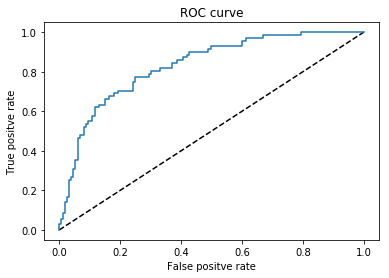

In [9]:
# predict for train, predict and obtain probabilities for test
train_dnn_pred = dnn.predict_classes(x_train)
test_dnn_pred = dnn.predict_classes(x_test)
dnn_prob_test = dnn.predict_proba(x_test)

# print all the scores requested
all_scores(y_train, train_dnn_pred, y_test, test_dnn_pred)

# roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, dnn_prob_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


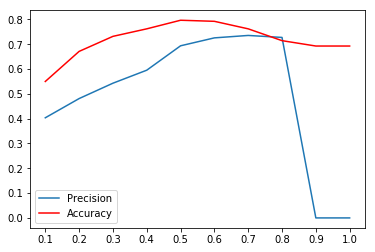

In [10]:
# plots the precision and accuracy curves
pre_acc_curves(y_test, dnn_prob_test)

Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

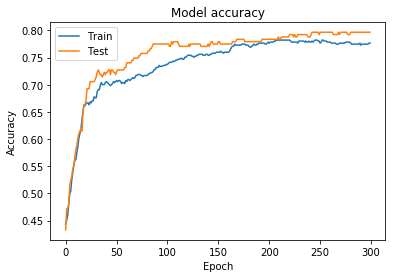

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

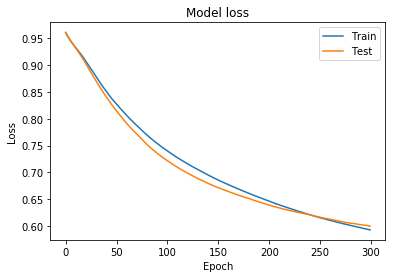

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[137  23]
 [ 27  44]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.66      0.62      0.64        71

   micro avg       0.78      0.78      0.78       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.78      0.78      0.78       231



array([0.0845639 , 0.27099242, 0.0881278 , 0.06229692, 0.07261699,
       0.16706017, 0.130684  , 0.1236578 ])

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 8 artists>

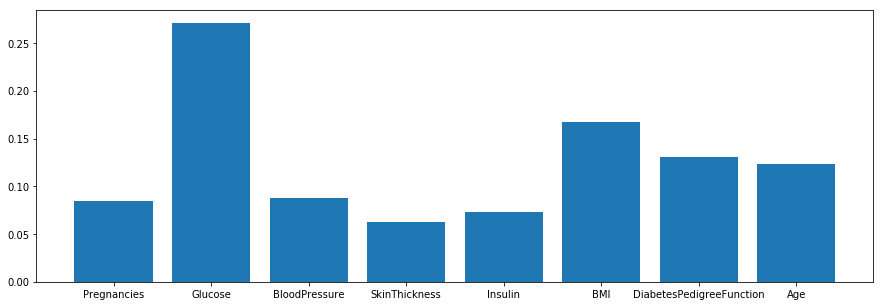

In [12]:
from sklearn.ensemble import RandomForestClassifier

# build and fit the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

# predict for train, predict and obtain probabilities for test
train_rfc_pred = rfc.predict(x_train)
test_rfc_pred = rfc.predict(x_test)
rfc_prob_test = rfc.predict_proba(x_test)

# print the confusion mareix and classification report
print(metrics.confusion_matrix(y_test,test_rfc_pred))
print(metrics.classification_report(y_test,test_rfc_pred))

# plot each features importance
rfc.feature_importances_
plt.figure(figsize=(15,5))
plt.bar(features.columns, rfc.feature_importances_)

# the model appears to be overfitting. the train scores are 1.0 whereas 
# the test scores seem relatively low. 

ACCURACY:
train acc: 1.0
test acc: 0.7835497835497836

PRECISION:
train precision: 1.0
test precision: 0.6567164179104478

RECALL:
train recall: 1.0
test recall: 0.6197183098591549

F1:
train f1: 1.0
test f1: 0.6376811594202898


Text(0.5, 1.0, 'ROC curve')

Text(0.5, 0, 'False positve rate')

Text(0, 0.5, 'True positve rate')

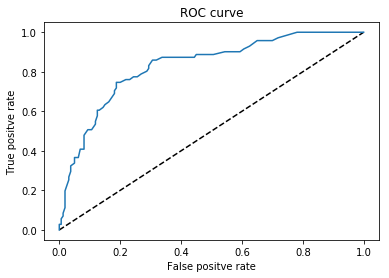

In [13]:
# print all the scores requested
all_scores(y_train, train_rfc_pred, y_test, test_rfc_pred)

# roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_prob_test[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')

build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[140  20]
 [ 29  42]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       160
           1       0.68      0.59      0.63        71

   micro avg       0.79      0.79      0.79       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.78      0.79      0.78       231



array([0.08291237, 0.28374425, 0.07463335, 0.05892509, 0.07591216,
       0.16997314, 0.12562259, 0.12827705])

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 8 artists>

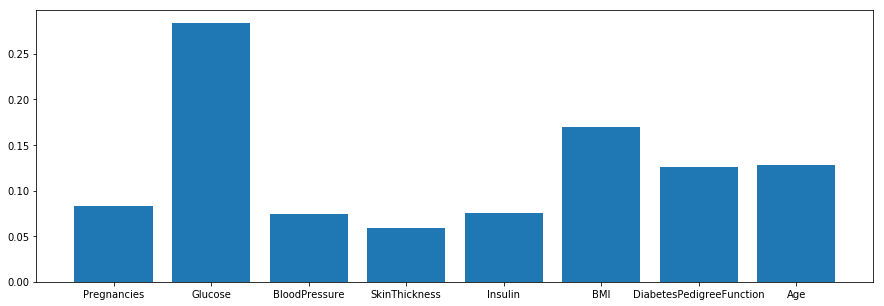

In [14]:
# build and fit the model
rfc2 = RandomForestClassifier(n_estimators=1000, max_depth=8)
rfc2.fit(x_train, y_train)

# predict for train, predict and obtain probabilities for test
train_rfc2_pred = rfc2.predict(x_train)
test_rfc2_pred = rfc2.predict(x_test)
rfc2_prob_test = rfc2.predict_proba(x_test)

# print the confusion mareix and classification report
print(metrics.confusion_matrix(y_test,test_rfc2_pred))
print(metrics.classification_report(y_test,test_rfc2_pred))

# plot each features importance
rfc2.feature_importances_
plt.figure(figsize=(15,5))
plt.bar(features.columns, rfc2.feature_importances_)

# the overfitting situation is a little better now thanks to the adjustment
# in max_depth. this make sense as max_depth is used as a regularizer in
# random forest models as they are prone to overfitting. note that this model
# can be much improved.

plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

ACCURACY:
train acc: 0.9813780260707635
test acc: 0.7878787878787878

PRECISION:
train precision: 0.9947089947089947
test precision: 0.6774193548387096

RECALL:
train recall: 0.9543147208121827
test recall: 0.5915492957746479

F1:
train f1: 0.9740932642487046
test f1: 0.631578947368421


E:\Users\Dhyan Gandhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


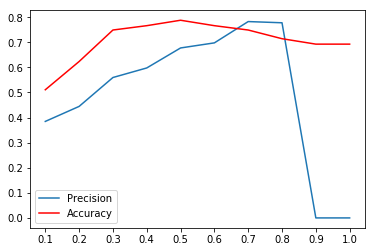

In [15]:
# plots the precision and accuracy curves
pre_acc_curves(y_test, rfc2_prob_test[:,1])

# print all the scores requested
all_scores(y_train, train_rfc2_pred, y_test, test_rfc2_pred)

# Finally: 
- Write a few lines about each of the three models and if there is one superior model and why do you think so?

In [16]:
# LOGISTIC REGRESSION
# logistic regression is good benchmark model for clasification. it a simple
# yet powerful model and can yield good initial results. this type of model is
# more likely to underfit than overfit. 

# DEEP NEURAL NETWORK
# neural networks are very powerful tools but are prone to some common pitfalls.
# more neurons doesn't mean better performance. it has the ability to model very
# complex data. to overcome this, analyst need to utilize regularizers, dropouts,
# and learning rate adjustments.

# RANDOM FOREST CLASSIFIER
# random forest appeared to be the best for this particular problem. 
# i fel that way because it yeilded the best results once we addressed 
# the overfitting issue. it is very simple to use and works accross linear
# and logistic problem types. however "the best" model is a case by case decision. in our assignment we see how 
# prone to overfitting random forest is. to negate this effect we utilize the
# max_depth parameter. 

- **Also thanks for a great quarter :) .. I will miss you and wish you all the best**

- **Do not forget to submit the survey about the class. Be specific about your problems. Class settings, instructor, material, .. etc. Your voice makes a difference**

![](machine_learning.png)